# _Long Only Portfolio_

The following notebook will introduce you to a simple performance analyses of our long only strategy for a timeline of 105 months between 2011 and 2019. Our benchmark is the SPX and fees are annually. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from texttable import Texttable

    The csv file contains the following series:
        - SPX Returns 
        - Real Portfolio Returns
        - Predicted ML Returns
    
    We need to adjust the Real Portfolio Returns by the commission fees (1% Annually = 0.083% Monthly). Predicted Returns will not be plotted since this value is not interesting for our research. 

In [41]:
data= pd.read_csv("../data/long_only_return_.csv")
# data['effectif'] = data['effectif'] - 1/12
data['date'] = pd.to_datetime(data['date'])
data.head()

,sp500,effectif,prediction,date
0,-0.104731,5.309825,3.697888,2011-03-01
1,2.849538,3.510280,3.375629,2011-04-01
2,-1.350095,0.413519,2.915016,2011-05-01
3,-1.825746,0.637915,3.057459,2011-06-01
4,-2.147443,-1.501983,3.848040,2011-07-01


    Our Portfolio on average outperforms the benchmark with a lower standard deviation (fees included). 
    
    By the rule of thumb if the skewness is between -0.5 and 0.5, the data are fairly symmetrical ; if the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed ; if the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed. SPX is positively skewed, but our portfolio is sim-neg skewed, the reason why we beat our benchmark.
    
    

In [78]:
t = Texttable()
t.add_rows([['Series', 'Mean Return', 'Std', 'Skewness' , 'Kurtosis'], 
            ['SPX', str(round(data['sp500'].mean(),2))+'%', str(round(data['sp500'].std(),2))+'%',
             str(round(data['sp500'].kurt(),2))+'%',  str(round(data['sp500'].skew(),2))+'%'], 
            
            ['Portfolio', str(round(data['effectif'].mean(),2))+'%', str(round(data['effectif'].std(),2))+'%',
              str(round(data['effectif'].kurt(),2))+'%',  str(round(data['effectif'].skew(),2))+'%'
            ]])

print(t.draw())
#alpha = (round((data['effectif'].mean()-data['sp500'].mean()),2)) 
print('The Alpha of our Portfolio on average is: '+str(alpha)+'%')

+-----------+-------------+-------+----------+----------+
|  Series   | Mean Return |  Std  | Skewness | Kurtosis |
+===========+=============+=======+==========+==========+
| SPX       | 0.88%       | 3.38% | 0.98%    | -0.35%   |
+-----------+-------------+-------+----------+----------+
| Portfolio | 1.2%        | 2.8%  | -0.24%   | -0.14%   |
+-----------+-------------+-------+----------+----------+
The Alpha of our Portfolio on average is: 0.32%


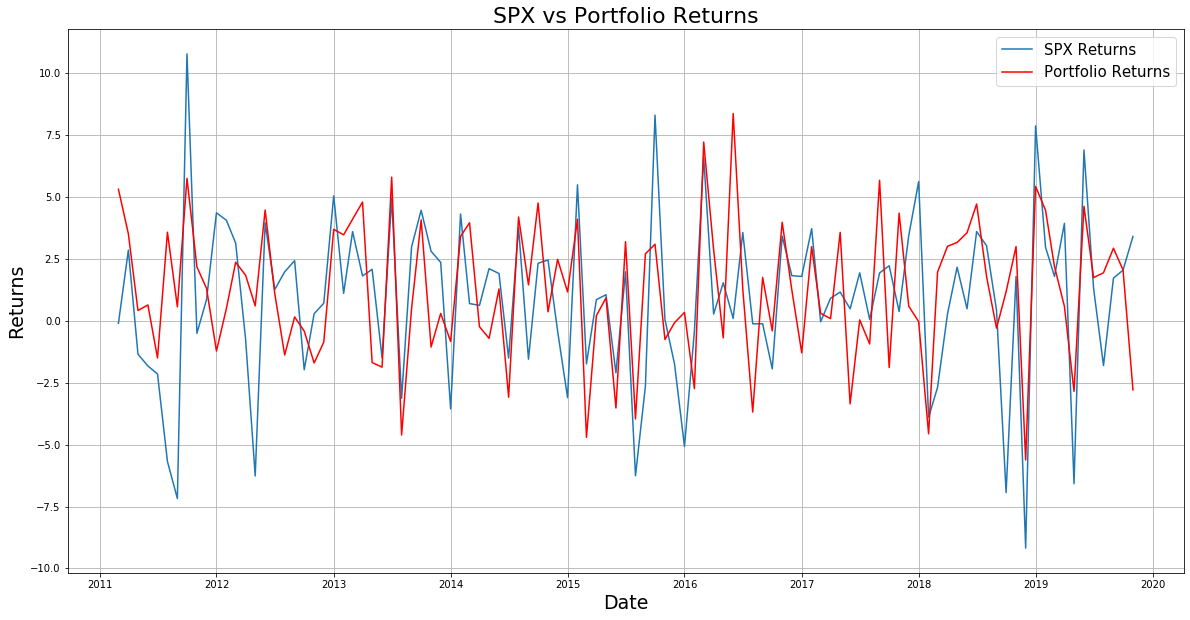

In [59]:
plt.figure(figsize=(20,10))
plt.plot(data.date, data.sp500, label='SPX Returns')
plt.plot(data.date, data.effectif, c='r', label='Portfolio Returns')
plt.title('SPX vs Portfolio Returns', size = 22)
plt.xlabel('Date', fontsize=19)
plt.ylabel('Returns', fontsize=19)
plt.legend(prop={'size': 15})
plt.grid()
plt.show()

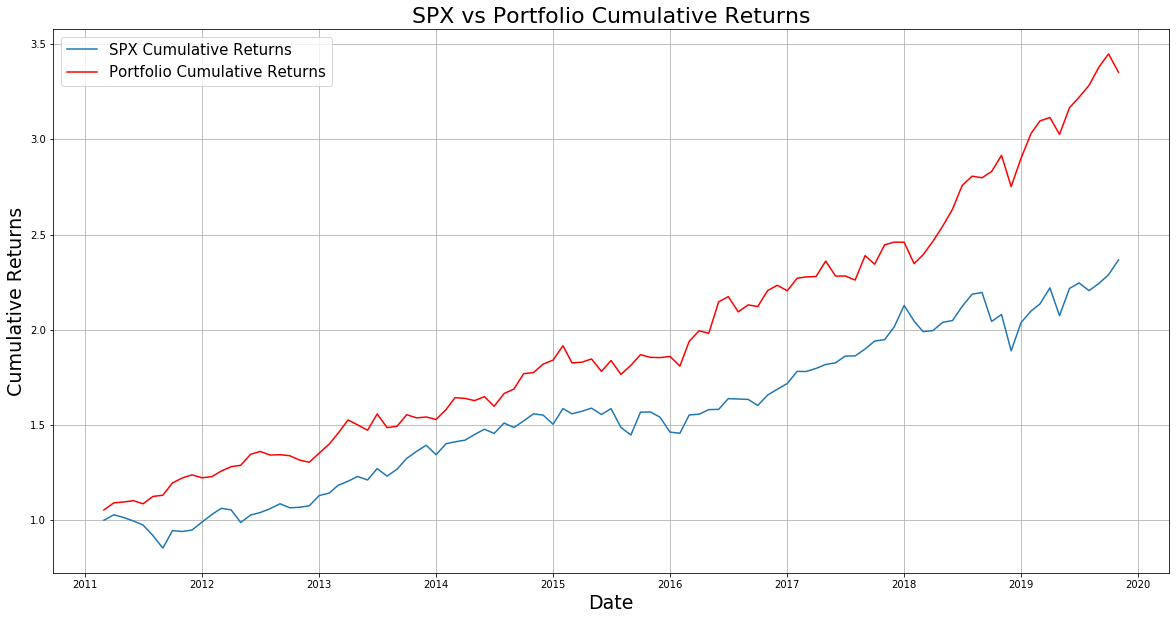

In [86]:
cumulative_ret_port = (data['effectif']/100 + 1).cumprod()
cumulative_ret_SPX = (data['sp500']/100 + 1).cumprod()
plt.figure(figsize=(20,10))
plt.plot(data.date, list(cumulative_ret_SPX),label='SPX Cumulative Returns')
plt.plot(data.date, list(cumulative_ret_port), c='r', label='Portfolio Cumulative Returns')
plt.title('SPX vs Portfolio Cumulative Returns', size = 22)
plt.xlabel('Date', fontsize=19)
plt.ylabel('Cumulative Returns', fontsize=19)
plt.legend(prop={'size': 15})
plt.grid()
plt.show()

The Cumulative Return of our portfolio beats our benchmark with an Alpha without management fees and performance fees  0.99%.

In [100]:
t = Texttable()
t.add_rows([['Series', 'Cumulative Returns'], 
            ['SPX', str(round((list(cumulative_ret_SPX)[-1]-1),2))+'%'], 
            ['Portfolio',str(round((list(cumulative_ret_port)[-1]-1),2))+'%'
            ]])
print('Alpha without fees: '+ str(round((list(cumulative_ret_port)[-1]-1) - (list(cumulative_ret_SPX)[-1]-1) 
                                        ,2))+'%' ) 
print(t.draw())

Alpha without fees: 0.99%
+-----------+--------------------+
|  Series   | Cumulative Returns |
+===========+====================+
| SPX       | 1.37%              |
+-----------+--------------------+
| Portfolio | 2.35%              |
+-----------+--------------------+
